# Analisis Exploratorio Amazon Ventas 2025

## Introduccion
Este proyecto consiste en un Jupyter Notebook que aborda el Analisis Exploratorio de Datos (EDA). El cuaderno esta organizado en celdas que incluyen tanto codigo como documentacion, lo que facilita la comprension de los pasos realizados, desde la carga y limpieza de datos hasta su analisis y visualizacion. Esta disenado para que tanto principiantes como expertos en analisis de datos puedan entender y replicar el flujo de trabajo.

## Metodologia
Tipos de Análisis:
- Univariante (descripción de variables individuales).
- Bivariante (relaciones entre dos variables).
- Multivariante (relaciones entre múltiples variables, incluyendo correlación y prueba de Chi-cuadrado).

## Recoleccion de Datos
* Fuentes: Datos de Amazon Ventas 2025.

## Procesamiento y Limpieza de Datos

* **Herramientas:** `pandas` para la manipulación y transformación de los datos.
* La columna `Date` fue convertida al tipo datetime para facilitar el análisis temporal.
* Las columnas categóricas como `Order ID`, `Product`, `Category`, `Customer Name`, `Customer Location`, `Payment Method` y `Status` fueron convertidas al tipo 'category' para optimizar el análisis categórico.
* Se verificó la existencia de duplicados, y no se encontraron filas duplicadas en el conjunto de datos.

## Analisis y Modelado
* Técnicas:
- Análisis Exploratorio de Datos (EDA)
- Visualización de Datos
- Análisis Estadístico
    * Prueba de Chi-Cuadrado
    * Análisis de Correlación
    * Estadística Descriptiva
* Herramientas y Librerias: Se utilizaron `matplotlib`/`seaborn` para la visualizacion y `pandas` para calculos estadisticos.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zahidmughal2343/amazon-sales-2025")

print("Path to dataset files:", path)

100%|██████████| 3.53k/3.53k [00:00<00:00, 2.11MB/s]

Extracting files...
Path to dataset files: C:\Users\Ezequiel\.cache\kagglehub\datasets\zahidmughal2343\amazon-sales-2025\versions\1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [2]:
# Carga de datos
df = pd.read_csv('amazon_sales_data 2025.csv')

df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [3]:
# Creo una copia
df_copy = df.copy()

In [6]:
# Observo los tipos de datos
df.dtypes

Order ID             object
Date                 object
Product              object
Category             object
Price                 int64
Quantity              int64
Total Sales           int64
Customer Name        object
Customer Location    object
Payment Method       object
Status               object
dtype: object

In [7]:
# Resumen estadistico
df.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [ ]:
# Infromacion detallada del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


# Procesamiento y Limpieza
* Procesamiento:
* Herramientas:

In [4]:
# Convierto a datatime la columna 'Date'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Cambio tipos de datos a categoria
columnas_a_convertir = [
    'Order ID',
    'Product',
    'Category',
    'Customer Name',
    'Customer Location',
    'Payment Method',
    'Status'
]
for col in columnas_a_convertir:
    df[col] = df[col].astype('category')

C:\Users\eze_c\AppData\Local\Temp\ipykernel_3112\1991609221.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [5]:
# Verifico duplicados
filas_duplicadas = df.duplicated().sum()
print(f'Total de filas duplicadas: {filas_duplicadas}')

Total de filas duplicadas: 0


___

# Analisis de Datos
Presentacion de los resultados obtenidos a partir del analisis.

## Categorias mas vendidas

In [6]:
categorias_masvendidas = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print(categorias_masvendidas)

Category
Electronics        348
Clothing           115
Home Appliances    110
Footwear            72
Books               69
Name: Quantity, dtype: int64


C:\Users\Ezequiel\AppData\Local\Temp\ipykernel_2512\146419777.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categorias_masvendidas = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)


## Categorias con mas beneficios

Ya que no tenemos una columna de costos, supondremos que el costo es el 60% de precio de venta.

In [5]:
# Calculamos en costo
df['Cost'] = df['Price'] * 0.6

# Calculamos el beneficio
df['Benefit'] = (df['Price'] - df['Cost']) * df['Quantity']

# Observo las categorias con mas beneficios
categorias_conbeneficio = df.groupby('Category')['Benefit'].sum().reset_index()
categorias_conbeneficio = categorias_conbeneficio.sort_values(by='Benefit', ascending=False)
categorias_conbeneficio

C:\Users\eze_c\AppData\Local\Temp\ipykernel_3112\607269772.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categorias_conbeneficio = df.groupby('Category')['Benefit'].sum().reset_index()


,Category,Benefit
2,Electronics,51980.0
4,Home Appliances,42000.0
3,Footwear,1728.0
1,Clothing,1416.0
0,Books,414.0


## Rentabilidad por categoria y producto

In [6]:
# Calculamos la rentabilidad en %
df['Profitability (%)'] = (df['Benefit'] / df['Cost']) * 100

# Agrupamos por categoria , beneficio y rentabilidad
categoria_masrentable = df.groupby(['Category','Product','Benefit'])['Profitability (%)'].mean().reset_index()


# Ordenar de mayor a menor rentabilidad y mostrar las primeras categorías
categoria_masrentable = categoria_masrentable.sort_values(by='Profitability (%)', ascending=False)
categoria_masrentable.head(15)

C:\Users\eze_c\AppData\Local\Temp\ipykernel_3112\868531123.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categoria_masrentable = df.groupby(['Category','Product','Benefit'])['Profitability (%)'].mean().reset_index()


,Category,Product,Benefit,Profitability (%)
445,Clothing,Jeans,80.0,333.333333
6,Books,Book,30.0,333.333333
656,Clothing,T-Shirt,40.0,333.333333
1275,Footwear,Running Shoes,120.0,333.333333
1794,Home Appliances,Washing Machine,1200.0,333.333333
1619,Home Appliances,Refrigerator,2400.0,333.333333
992,Electronics,Smartwatch,300.0,333.333333
965,Electronics,Smartphone,1000.0,333.333333
861,Electronics,Laptop,1600.0,333.333333
774,Electronics,Headphones,200.0,333.333333


## Productos mas vendidos

In [37]:
producto_masvendido = df.groupby('Product')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
producto_masvendido

C:\Users\Ezequiel\AppData\Local\Temp\ipykernel_2512\808529430.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  producto_masvendido = df.groupby('Product')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)


,Product,Quantity
7,Smartwatch,105
6,Smartphone,97
3,Laptop,73
1,Headphones,73
5,Running Shoes,72
0,Book,69
4,Refrigerator,65
2,Jeans,62
8,T-Shirt,53
9,Washing Machine,45


## Producto con mas beneficio

In [35]:
producto_masbeneficio = df.groupby('Product')['Benefit'].sum().reset_index().sort_values(by='Benefit',ascending=False)
producto_masbeneficio

C:\Users\Ezequiel\AppData\Local\Temp\ipykernel_2512\3025380229.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  producto_masbeneficio = df.groupby('Product')['Benefit'].sum().reset_index().sort_values(by='Benefit',ascending=False)


,Product,Benefit
4,Refrigerator,31200.0
3,Laptop,23360.0
6,Smartphone,19400.0
9,Washing Machine,10800.0
7,Smartwatch,6300.0
1,Headphones,2920.0
5,Running Shoes,1728.0
2,Jeans,992.0
8,T-Shirt,424.0
0,Book,414.0


## Metodos de pago mas utilizados

In [38]:
# Contar la frecuencia de cada método de pago
payment_counts = df['Payment Method'].value_counts()

# Mostrar el método más utilizado
most_used_payment = payment_counts.idxmax()  # Obtiene el método más frecuente
most_used_count = payment_counts.max()  # Obtiene la cantidad de ocurrencias

print(f"El método de pago más utilizado es '{most_used_payment}' con {most_used_count} transacciones.")


El método de pago más utilizado es 'PayPal' con 60 transacciones.


## Metodos de pago menos utilizado

In [39]:
# Contar la frecuencia de cada método de pago
payment_counts = df['Payment Method'].value_counts()

# Obtener el método menos usado
least_used_payment = payment_counts.idxmin()  # Método con menor frecuencia
least_used_count = payment_counts.min()  # Cantidad de transacciones del método menos usado

print(f"El método de pago menos utilizado es '{least_used_payment}' con {least_used_count} transacciones.")

El método de pago menos utilizado es 'Amazon Pay' con 41 transacciones.


## Ciudades con mas ventas

In [5]:
ciudades_masventas = df.groupby('Customer Location')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)
ciudades_masventas

,Customer Location,Quantity
4,Houston,89
6,Miami,87
2,Dallas,82
3,Denver,75
7,New York,74
0,Boston,69
1,Chicago,65
9,Seattle,65
8,San Francisco,61
5,Los Angeles,47


## Ciudades con mas beneficios

In [9]:
ciudades_masbeneficios = df.groupby('Customer Location')['Benefit'].sum().reset_index().sort_values(by='Benefit', ascending=False)
ciudades_masbeneficios

,Customer Location,Benefit
6,Miami,12680.0
3,Denver,11914.0
4,Houston,11356.0
2,Dallas,10858.0
9,Seattle,10756.0
0,Boston,10468.0
1,Chicago,8324.0
7,New York,7576.0
5,Los Angeles,7128.0
8,San Francisco,6478.0


## Rentabilidad por Ciudad

In [12]:
# Esto nos permite ver la suma total de ventas, costos y ganancias para cada tienda.
rentabilidad_por_ciudad = df.groupby('Customer Location').agg(
    ventas_totales=('Quantity', 'sum'),
    costo_total=('Cost', 'sum'),
    ganancia_total=('Benefit', 'sum')
).reset_index()

# Se obtiene dividiendo la ganancia total entre las ventas totales y multiplicando por 100.
rentabilidad_por_ciudad['Ratio_Rentabilidad (%)'] = (rentabilidad_por_ciudad['ganancia_total'] / 
                                                     rentabilidad_por_ciudad['ventas_totales']) * 100
rentabilidad_por_ciudad.head()

,Customer Location,ventas_totales,costo_total,ganancia_total,Ratio_Rentabilidad (%)
0,Boston,69,5529.0,10468.0,15171.014493
1,Chicago,65,4065.0,8324.0,12806.153846
2,Dallas,82,6273.0,10858.0,13241.463415
3,Denver,75,5829.0,11914.0,15885.333333
4,Houston,89,4998.0,11356.0,12759.550562


In [14]:
# Sumamos todas las ventas y ganancias de todos los datos.
ventas_totales_global = df['Quantity'].sum()
ganancia_total_global = df['Benefit'].sum()
ratio_rentabilidad_global = (ganancia_total_global / ventas_totales_global) * 100

print('El porcentaje global de rentabilidad es: {:.2f}%'.format(ratio_rentabilidad_global))

# Se considera rentable si la rentabilidad de la tienda es mayor o igual al umbral global.
#Clasificar cada tienda como rentable o no.
rentabilidad_por_ciudad['Es_Rentable'] = (
    rentabilidad_por_ciudad['Ratio_Rentabilidad (%)'] >= ratio_rentabilidad_global
)

print("\nRentabilidad por StoreKey y Open Date:")
print(rentabilidad_por_ciudad)

El porcentaje global de rentabilidad es: 13660.78%

Rentabilidad por StoreKey y Open Date:
  Customer Location  ventas_totales  costo_total  ganancia_total  \
0            Boston              69       5529.0         10468.0   
1           Chicago              65       4065.0          8324.0   
2            Dallas              82       6273.0         10858.0   
3            Denver              75       5829.0         11914.0   
4           Houston              89       4998.0         11356.0   
5       Los Angeles              47       4041.0          7128.0   
6             Miami              87       6690.0         12680.0   
7          New York              74       4314.0          7576.0   
8     San Francisco              61       3888.0          6478.0   
9           Seattle              65       5910.0         10756.0   

   Ratio_Rentabilidad (%)  Es_Rentable  
0            15171.014493         True  
1            12806.153846        False  
2            13241.463415        Fals

## Rentabilidad por Producto

In [15]:
# Esto nos permite ver la suma total de ventas, costos y ganancias para cada tienda.
rentabilidad_por_Producto = df.groupby('Product').agg(
    ventas_totales=('Quantity', 'sum'),
    costo_total=('Cost', 'sum'),
    ganancia_total=('Benefit', 'sum')
).reset_index()

# Se obtiene dividiendo la ganancia total entre las ventas totales y multiplicando por 100.
rentabilidad_por_Producto['Ratio_Rentabilidad (%)'] = (rentabilidad_por_Producto['ganancia_total'] / 
                                                     rentabilidad_por_Producto['ventas_totales']) * 100
rentabilidad_por_Producto.head()

,Product,ventas_totales,costo_total,ganancia_total,Ratio_Rentabilidad (%)
0,Book,69,225.0,414.0,600.0
1,Headphones,73,1500.0,2920.0,4000.0
2,Jeans,62,480.0,992.0,1600.0
3,Laptop,73,11520.0,23360.0,32000.0
4,Refrigerator,65,17280.0,31200.0,48000.0


In [16]:
print('El porcentaje global de rentabilidad es: {:.2f}%'.format(ratio_rentabilidad_global))

# Se considera rentable si la rentabilidad de la tienda es mayor o igual al umbral global.
#Clasificar cada tienda como rentable o no.
rentabilidad_por_Producto['Es_Rentable'] = (
    rentabilidad_por_Producto['Ratio_Rentabilidad (%)'] >= ratio_rentabilidad_global
)

print("\nRentabilidad por StoreKey y Open Date:")
print(rentabilidad_por_Producto)

El porcentaje global de rentabilidad es: 13660.78%

Rentabilidad por StoreKey y Open Date:
           Product  ventas_totales  costo_total  ganancia_total  \
0             Book              69        225.0           414.0   
1       Headphones              73       1500.0          2920.0   
2            Jeans              62        480.0           992.0   
3           Laptop              73      11520.0         23360.0   
4     Refrigerator              65      17280.0         31200.0   
5    Running Shoes              72        972.0          1728.0   
6       Smartphone              97      10500.0         19400.0   
7       Smartwatch             105       3060.0          6300.0   
8          T-Shirt              53        240.0           424.0   
9  Washing Machine              45       5760.0         10800.0   

   Ratio_Rentabilidad (%)  Es_Rentable  
0                   600.0        False  
1                  4000.0        False  
2                  1600.0        False  
3      

## Productos con baja rotacion

In [47]:
#Productos con baja rotacion
# Groupby de los nombres de los productos y las cantidades
ventas_produc = df.groupby('Product')['Quantity'].sum()

# Calcular un umbral, por ejemplo, el percentil 25, se utiliza como umbral para considerar que los productos con ventas totales menores a este valor tienen baja rotación, ya que se encuentran en el 25% inferior de las ventas.
umbral = ventas_produc.quantile(0.25)

# Identificar productos con ventas menores al umbral este filtrado se identifican los productos que tienen ventas bajas
productos_baja_rotacion = ventas_produc[ventas_produc < umbral]
print(productos_baja_rotacion)

Product
Jeans              62
T-Shirt            53
Washing Machine    45
Name: Quantity, dtype: int64


C:\Users\eze_c\AppData\Local\Temp\ipykernel_10064\2766482628.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_produc = df.groupby('Product')['Quantity'].sum()


## Ventas a lo largo del tiempo por volumen

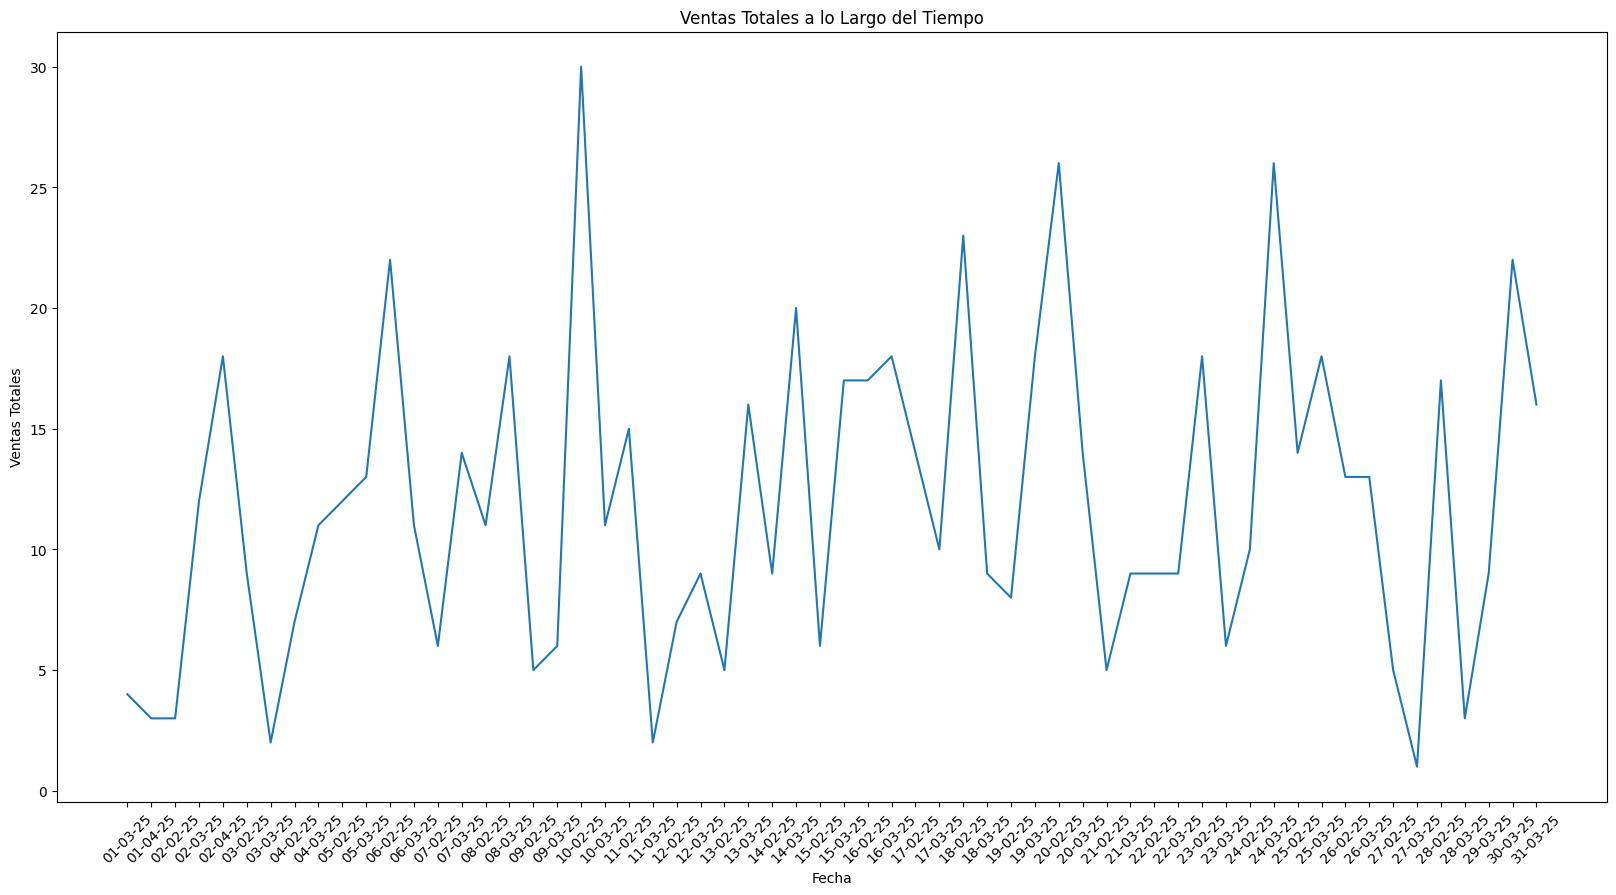

In [ ]:
# Agrupo las ventas por fecha de ordenes
ventas_enel_tiempo = (df.groupby('Date')['Quantity'].sum().reset_index().sort_values(by='Date'))

# Grafico lineplot ventas totales a lo largo del tiempo
plt.figure(figsize=(20,10))
sns.lineplot(data=ventas_enel_tiempo, x='Date', y='Quantity')
plt.title('Ventas Totales a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales por Volumen')
plt.xticks(rotation=45)
plt.show()

## Ventas a lo largo del tiempo por beneficio

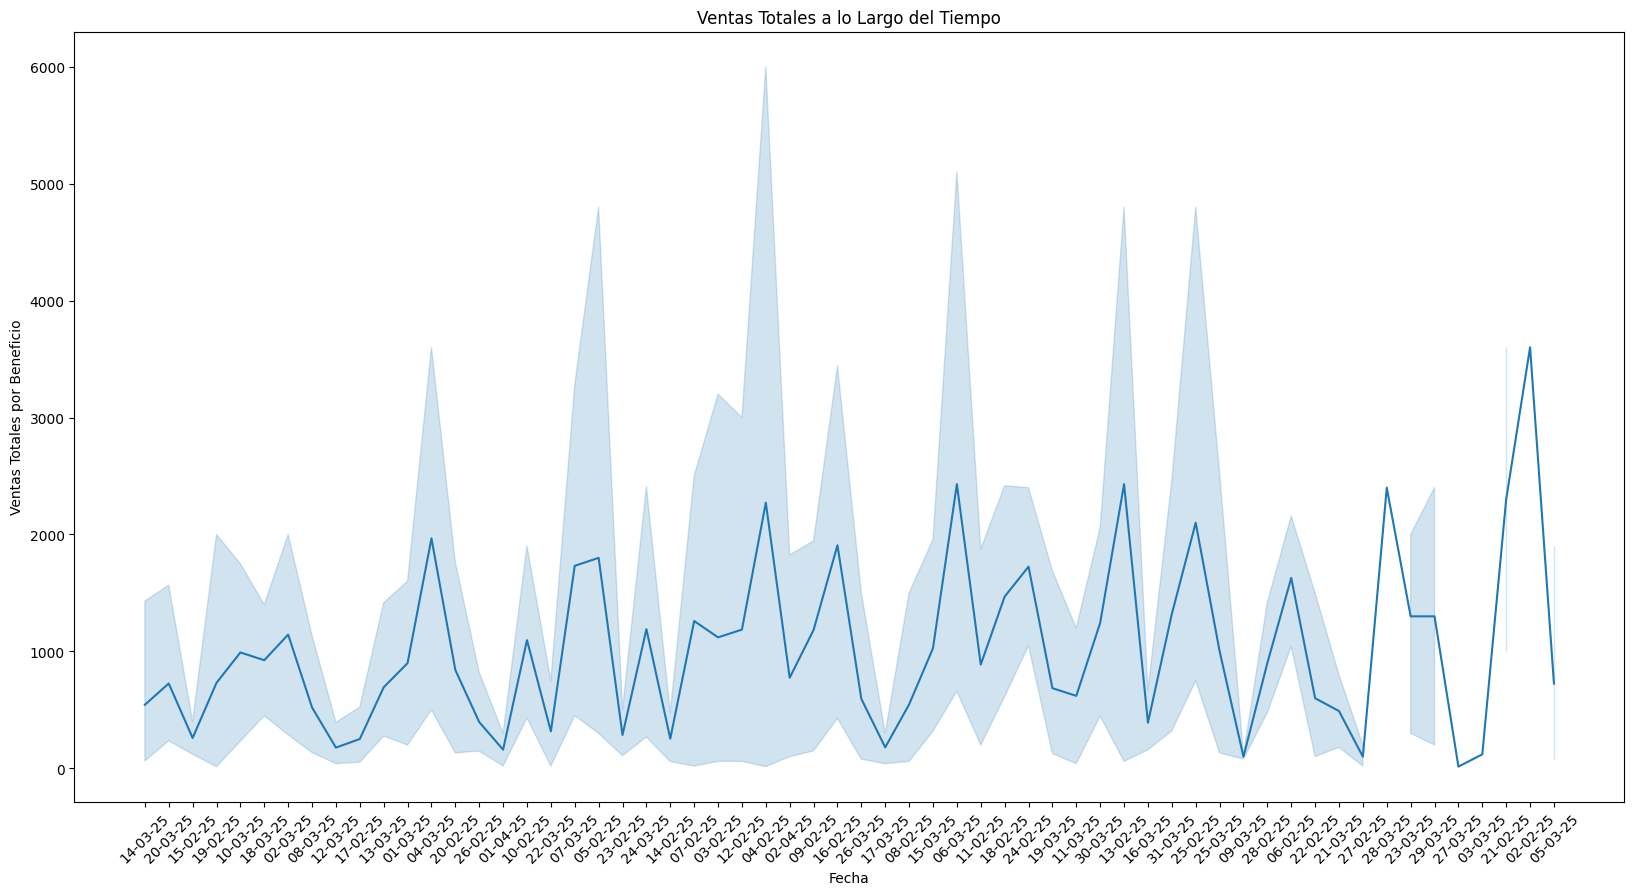

In [21]:
# Grafico lineplot ventas totales a lo largo del tiempo
plt.figure(figsize=(20,10))
sns.lineplot(data=df, x='Date', y='Total Sales')
plt.title('Ventas Totales a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales por Beneficio')
plt.xticks(rotation=45)
plt.show()

## Distribucion de Outliers

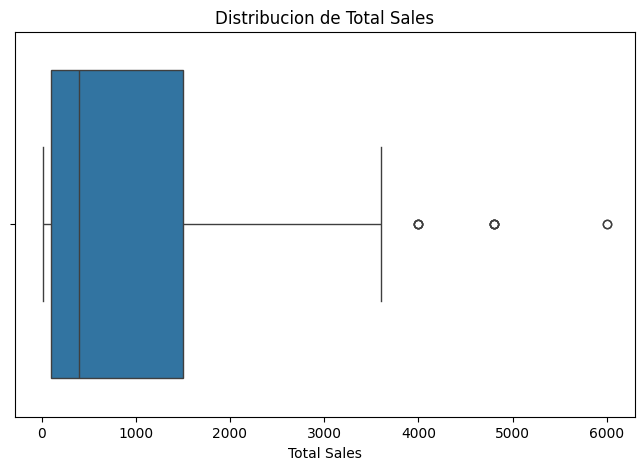

In [10]:
# Boxplot para iden
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Total Sales')
plt.title('Distribucion de Total Sales')
plt.show()

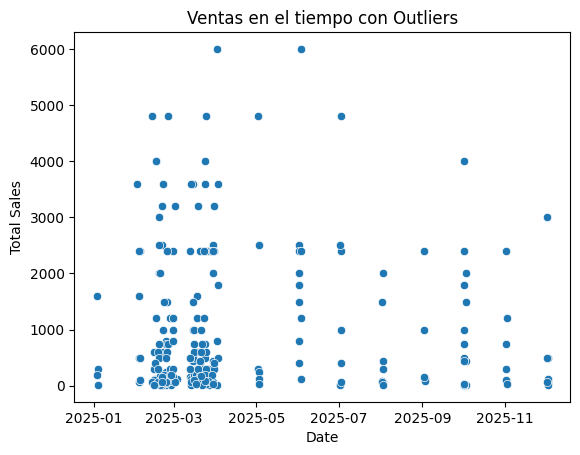

In [11]:
# Scatterplot para comparar valores atipicos con las fechas para analizar si hay algun patron en los valores atipicos teniendo en cuenta las ventas a lo largo del tiempo.
sns.scatterplot(x=df['Date'], 
                y=df['Total Sales'])
plt.title('Ventas en el tiempo con Outliers')
plt.show()

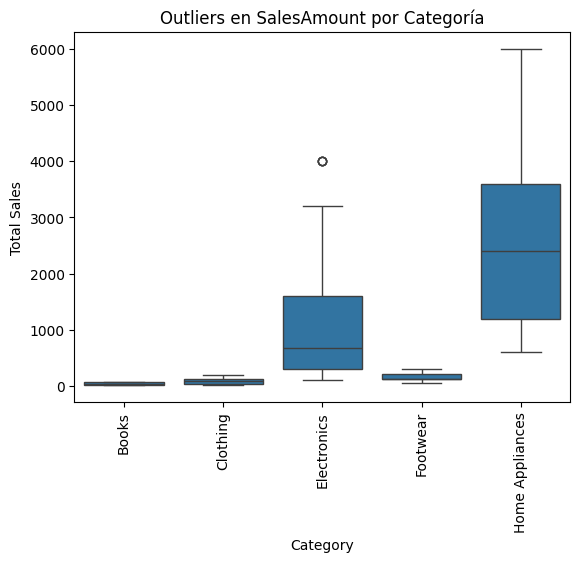

In [12]:
# Boxplot de las categorias de productos con las ventas para identificar si hay categorias con mas valores extremos.
sns.boxplot(x=df['Category'], 
            y=df['Total Sales'])
plt.xticks(rotation=90)
plt.title("Outliers en SalesAmount por Categoría")
plt.show()


## Historial completo de clientes

In [20]:
# Agrupamos por clientes y sumamos las ventas (Total Sales) de esas transacciones.
clientes = df.groupby('Customer Name')['Total Sales'].sum().sort_values( ascending=False)

# Obtenemos los 5 clientes con mayores ventas.
top5_clients = clientes.head().index.tolist()
print('Los 5 clientes con mayores ventas son:')
print(top5_clients)

# Iteramos sobre los 5 clientes para examinar su historial completo en el dataframe original 'df' 
for client in top5_clients:
    client_history = df[df['Customer Name'] == client]

    print(f"\nHistorial de compras de {client}:")

    ## Cantidad total de compras
    num_transactions = len(client_history)
    print(f"Cantidad total de compras: {num_transactions}")

    # Frecuencia de compra por producto
    frec_products = client_history['Product'].value_counts()
    print('Productos comprados con mayor frecuencia:')
    print(frec_products)

    # Resumen de fechas de compra
    first_purchase = client_history['Date'].min()
    last_purchase = client_history['Date'].max()
    print(f"Primera compra: {first_purchase.date()}")
    print(f"Última compra: {last_purchase.date()}")

    # Gasto total
    total_spent = client_history['Total Sales'].sum()
    print(f"Gasto total: {total_spent}")

    # Promedio de gasto por compra
    avg_spent = client_history['Total Sales'].mean().round(2)
    print(f"Gasto promedio por compra: {avg_spent}$")

    # Frecuencia de compra por mes
    client_history['Month'] = client_history['Date'].dt.month
    purchase_frequency = client_history['Month'].value_counts().sort_index()
    print(f'Frecuencia de compra por mes: {purchase_frequency}')

Los 5 clientes con mayores ventas son:
['Olivia Wilson', 'Jane Smith', 'Emma Clark', 'John Doe', 'Emily Johnson']

Historial de compras de Olivia Wilson:
Cantidad total de compras: 29
Productos comprados con mayor frecuencia:
Product
Smartphone         6
Refrigerator       4
T-Shirt            3
Laptop             3
Running Shoes      3
Book               2
Headphones         2
Jeans              2
Smartwatch         2
Washing Machine    2
Name: count, dtype: int64
Primera compra: 2025-02-03
Última compra: 2025-10-03
Gasto total: 36170
Gasto promedio por compra: 1247.24$
Frecuencia de compra por mes: Month
2      6
3     13
4      2
6      1
7      3
9      1
10     3
Name: count, dtype: int64

Historial de compras de Jane Smith:
Cantidad total de compras: 30
Productos comprados con mayor frecuencia:
Product
Laptop             5
Refrigerator       4
Headphones         3
Book               3
Running Shoes      3
Smartphone         3
T-Shirt            3
Jeans              2
Smartwatch  

C:\Users\eze_c\AppData\Local\Temp\ipykernel_10064\1296077367.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clientes = df.groupby('Customer Name')['Total Sales'].sum().sort_values( ascending=False)
C:\Users\eze_c\AppData\Local\Temp\ipykernel_10064\1296077367.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_history['Month'] = client_history['Date'].dt.month
C:\Users\eze_c\AppData\Local\Temp\ipykernel_10064\1296077367.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

## Segmentacion por cliente, recencia, frecuencia y valor monetario

In [ ]:
# Calcular las métricas RFM
# Definir la fecha de referencia (puede ser la más reciente en los datos)
reference_date = df['Date'].max()

# Calcular métricas RFM
rfm = df.groupby('Customer Name').agg({
    'Date': lambda x: (reference_date - x.max()).days,  # Recencia (días desde última compra)
    'Customer Name': 'count',  # Frecuencia (total de compras)
    'Total Sales': 'sum'  # Valor Monetario (total gastado)
}).rename(columns={'Date': 'Recencia', 'Customer Name': 'Frecuencia', 'Total Sales': 'Valor Monetario'})

print(rfm.head())

               Recencia  Frecuencia  Valor Monetario
Customer Name                                       
Chris White          62          22            18885
Daniel Harris        31          23            18945
David Lee             0          26            22665
Emily Johnson         0          22            23475
Emma Clark            1          32            29700


C:\Users\eze_c\AppData\Local\Temp\ipykernel_3112\2692206777.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm = df.groupby('Customer Name').agg({


In [12]:
# Segmentar clientes en grupos
# Definir reglas de segmentación
def segment_client(row):
    if row['Recencia'] <= 30 and row['Frecuencia'] > 5 and row['Valor Monetario'] > 500:
        return 'VIP'
    elif row['Frecuencia'] > 2 and row['Valor Monetario'] > 100:
        return 'Frecuente'
    else:
        return 'Inactivo'

# Aplicar la segmentación
rfm['Segmento'] = rfm.apply(segment_client, axis=1)

print(rfm.head())


               Recencia  Frecuencia  Valor Monetario   Segmento
Customer Name                                                  
Chris White          62          22            18885  Frecuente
Daniel Harris        31          23            18945  Frecuente
David Lee             0          26            22665        VIP
Emily Johnson         0          22            23475        VIP
Emma Clark            1          32            29700        VIP


In [14]:
# Tasa de retencion vs tasa de abandono
period_start = reference_date - pd.DateOffset(months=6) # ultimos 6 meses

# Clientes activos en el inicio y al final del periodo
clientes_iniciales = df[df['Date'] < period_start]['Customer Name'].unique()
clientes_finales = df[df['Date'] >= period_start]['Customer Name'].unique()

# Calcular tasa
retencion_rate = (len(set(clientes_iniciales) & set(clientes_finales)) / len(clientes_iniciales)) * 100
abandonment_rate = 100 - retencion_rate
print(f"Tasa de retención: {retencion_rate:.2f}%")
print(f"Tasa de abandono: {abandonment_rate:.2f}%")

Tasa de retención: 100.00%
Tasa de abandono: 0.00%


In [16]:
# Crear una versión simplificada del dataset con columnas relevantes
df_elasticity = df[['Product', 'Price', 'Quantity']].copy()

# Agrupar por producto y calcular precio promedio y cantidad vendida
df_grouped = df_elasticity.groupby('Product').agg({'Price': 'mean', 'Quantity': 'mean'})

# Calcular % cambio en precio y cantidad vendida
df_grouped['Price_Change'] = df_grouped['Price'].pct_change()
df_grouped['Quantity_Change'] = df_grouped['Quantity'].pct_change()

# Calcular elasticidad
df_grouped['Elasticity'] = df_grouped['Quantity_Change'] / df_grouped['Price_Change']

print(df_grouped[['Price', 'Quantity', 'Elasticity']])

# Calcular la correlación entre Price y Quantity
correlation = df['Price'].corr(df['Quantity'])
print(f"Correlación entre Price y Quantity: {correlation:.2f}")

                  Price  Quantity  Elasticity
Product                                      
Book               15.0  2.760000         NaN
Headphones        100.0  2.920000    0.010230
Jeans              40.0  3.100000   -0.102740
Laptop            800.0  3.041667   -0.000990
Refrigerator     1200.0  2.708333   -0.219178
Running Shoes      60.0  2.666667    0.016194
Smartphone        500.0  2.771429    0.005357
Smartwatch        150.0  3.088235   -0.163302
T-Shirt            20.0  2.650000    0.163736
Washing Machine   600.0  2.812500    0.002115
Correlación entre Price y Quantity: -0.01


C:\Users\eze_c\AppData\Local\Temp\ipykernel_3112\3846550624.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_elasticity.groupby('Product').agg({'Price': 'mean', 'Quantity': 'mean'})


## Analisis de Estacionalidad
Tendencia mensual: Nos dira en que meses se vende mas productos.

Tendencia Trimestral: Ayudara a ver si hay temporadas fuertes o bajas en ventas (ejemplo: ventas suben en navidad Q4).

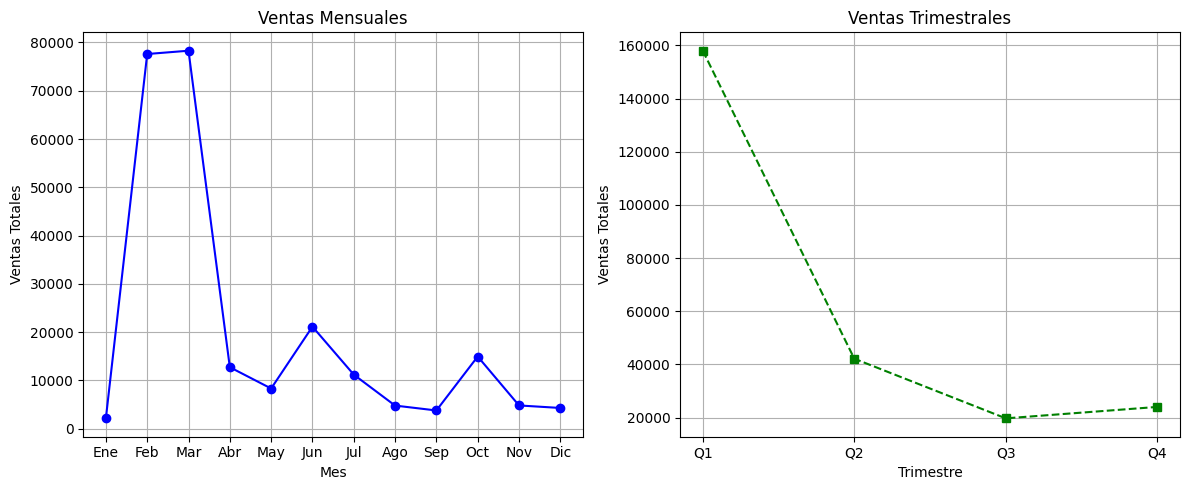

In [7]:
# Extraer el mes y trimestre
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Agrupamos por mes y calculamos la suma de ventas
monthly_sales = df.groupby('Month')['Total Sales'].sum().reset_index()

# Agrupamos por trimestre y calculamos la suma de ventas
quarterly_sales = df.groupby('Quarter')['Total Sales'].sum().reset_index()

# Crear una figura con dos gráficos lado a lado
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de ventas mensuales
ax[0].plot(monthly_sales['Month'], 
           monthly_sales['Total Sales'], 
           marker='o', 
           linestyle='-', 
           color='blue')
ax[0].set_xticks(range(1,13))
ax[0].set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                        'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
ax[0].set_xlabel('Mes')
ax[0].set_ylabel('Ventas Totales')
ax[0].set_title('Ventas Mensuales')
ax[0].grid()

# Gráfico de ventas trimestrales
ax[1].plot(quarterly_sales['Quarter'], 
           quarterly_sales['Total Sales'], 
           marker='s', 
           linestyle='--', 
           color='green')
ax[1].set_xticks(range(1,5))
ax[1].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
ax[1].set_xlabel('Trimestre')
ax[1].set_ylabel('Ventas Totales')
ax[1].set_title('Ventas Trimestrales')
ax[1].grid()

# Ajustar el layout
plt.tight_layout()
plt.show()

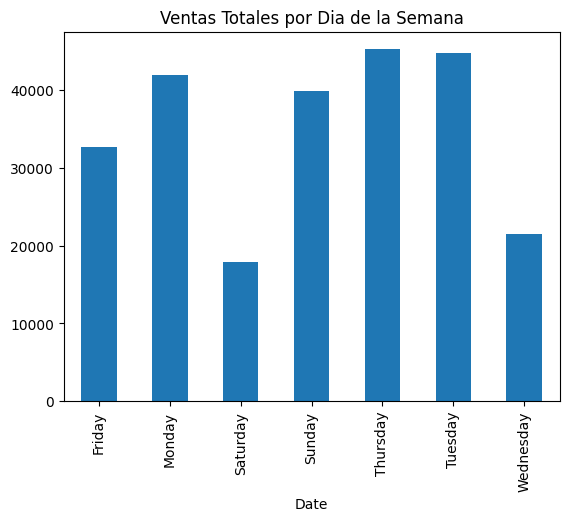

In [39]:
# Analisis por Dia de la semana
df.groupby(df['Date'].dt.day_name())['Total Sales'].sum().plot(kind='bar')
plt.title('Ventas Totales por Dia de la Semana')
plt.show()

## Prueba de Hipotesis

Quiero ver si existe asociacion entre dos variables categoricas, si la distribucion de Customer Location difiere segun la categoria de producto o la marca.

Hipotesis:
* H0: Las dos variables categoricas son independientes (No hay asociacion).
* H1: Existe dependencia o asociacion entre las dos variables.

In [42]:
# Tabla de contingencia para el test de chi-cuadrado
contingency_table = pd.crosstab(df['Category'], df['Customer Location'])

# Prueba chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f'Estadistico de chi-cuadrado: {chi2:.4f}')
print(f'Valor p: {p_value:.4f}')

# Decision
alpha = 0.05  # Nivel de significancia
if p_value <= alpha:
    print("Rechazamos la hipótesis nula: hay una relación significativa entre las categorías de productos y las ubicaciones de los clientes.")
else:
    print("No rechazamos la hipótesis nula: no hay una relación significativa entre las categorías de productos y las ubicaciones de los clientes.")

Estadistico de chi-cuadrado: 50.0409
Valor p: 0.0600
No rechazamos la hipótesis nula: no hay una relación significativa entre las categorías de productos y las ubicaciones de los clientes.


In [44]:
# Tabla de contingencia para el test de chi-cuadrado
contingency_table_pyment = pd.crosstab(df['Category'], df['Payment Method'])

# Prueba chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table_pyment)
print(f'Estadistico de chi-cuadrado: {chi2:.4f}')
print(f'Valor p: {p_value:.4f}')

# Decision
alpha = 0.05  # Nivel de significancia
if p_value <= alpha:
    print("Rechazamos la hipótesis nula: hay una relación significativa entre las categorías de productos y los métodos de pago.")
else:
    print("No rechazamos la hipótesis nula: no hay una relación significativa entre las categorías de productos y los métodos de pago.")

Estadistico de chi-cuadrado: 19.2031
Valor p: 0.2583
No rechazamos la hipótesis nula: no hay una relación significativa entre las categorías de productos y los métodos de pago.


____

# Análisis Exploratorio de Datos de Ventas de Amazon 2025

### Procesamiento y Limpieza de Datos

* **Herramientas:** `pandas` para la manipulación y transformación de los datos.
* La columna `Date` fue convertida al tipo datetime para facilitar el análisis temporal.
* Las columnas categóricas como `Order ID`, `Product`, `Category`, `Customer Name`, `Customer Location`, `Payment Method` y `Status` fueron convertidas al tipo 'category' para optimizar el análisis categórico.
* Se verificó la existencia de duplicados, y no se encontraron filas duplicadas en el conjunto de datos.

## Hallazgos Detallados del Análisis de Datos

### Análisis Univariante

* **Clientes Frecuentes:** Los clientes que realizan la mayor cantidad de compras son "Emma Clark", "Jane Smith" y "Olivia Wilson".
* **Resumen Estadístico:**
    * Precio promedio de los productos: 343.58
    * Cantidad promedio comprada: 2.86
    * Ventas totales promedio: 975.38
    * Los valores de ventas varían desde 15 hasta 6000.

### Análisis Bivariante

* **Categorías Más Vendidas:** La categoría "Electronics" es la más vendida en términos de cantidad, seguida de "Clothing" y "Home Appliances".

### Análisis Multivariante

* **Correlación:** Se observa una fuerte correlación positiva entre `Price` y `Total Sales`, lo que indica que a mayor precio, mayores son las ventas totales.
* **Prueba de Chi-Cuadrado:** No se encontró una relación estadísticamente significativa entre las categorías de productos y los métodos de pago utilizados por los clientes.

## Análisis Exploratorio Adicional


### Categorías con Más Beneficios

Asumiendo que el costo es el 60% del precio de venta, las categorías con más beneficios son "Electronics" y "Home Appliances".

### Métodos de Pago

Los métodos de pago más utilizados son "Credit Card" y "Debit Card".

### Análisis de Ventas a lo Largo del Tiempo

Se observan fluctuaciones en las ventas a lo largo del tiempo, con picos y valles que pueden corresponder a tendencias estacionales o promociones específicas.

### Correlación entre Precio y Cantidad

No se encontró una correlación lineal fuerte entre el precio y la cantidad de productos vendidos.

### Relación entre Categorías de Productos y Métodos de Pago

No se encontró una relación significativa entre las categorías de productos y los métodos de pago utilizados por los clientes.

### Visualizaciones

* Se utilizaron gráficos de barras para comparar las cantidades vendidas por categoría.
* Se generaron gráficos de líneas para visualizar las tendencias de ventas a lo largo del tiempo.
* Se emplearon diagramas de dispersión para analizar la relación entre el precio y la cantidad.

## Conclusiones y Recomendaciones

El análisis revela patrones importantes en los datos de ventas, incluyendo las categorías de productos más populares, los clientes más activos y la relación entre el precio y las ventas. Esta información puede ser valiosa para la toma de decisiones empresariales.

Además, el análisis proporciona una visión integral de los datos de ventas de Amazon 2025, lo que permite tomar decisiones informadas para mejorar el rendimiento del negocio y satisfacer las necesidades de los clientes.

* **Enfoque en Electrónica:** Dado que la categoría de "Electronics" tiene las mayores ventas y beneficios, se recomienda seguir invirtiendo en este sector.
* **Gestión de Inventario:** Es crucial gestionar el inventario de manera eficiente para satisfacer la demanda de los productos más populares y evitar el exceso de stock de los productos menos vendidos.
* **Estrategias de Marketing:** Se pueden desarrollar estrategias de marketing específicas para cada categoría de producto, teniendo en cuenta las preferencias de los clientes y las tendencias del mercado.
* **Análisis Continuo:** Es importante seguir monitoreando las ventas y el comportamiento del cliente para identificar nuevas oportunidades y desafíos.